# Hemuppgift 10

In [2]:
import numpy as np
import matplotlib.pyplot as plt

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

### Introduktion

I denna uppgift ska du fortsätta anpassa funktioner till data. Läs in datafilen *pendel10.csv*.

In [3]:
data = np.genfromtxt('pendel10.csv', delimiter=',', skip_header=1, usecols = (2, 3, 4, 5))

Först skapar vi våra variabler $l$ och $T$ med osäkerheter och plotar resultatet:

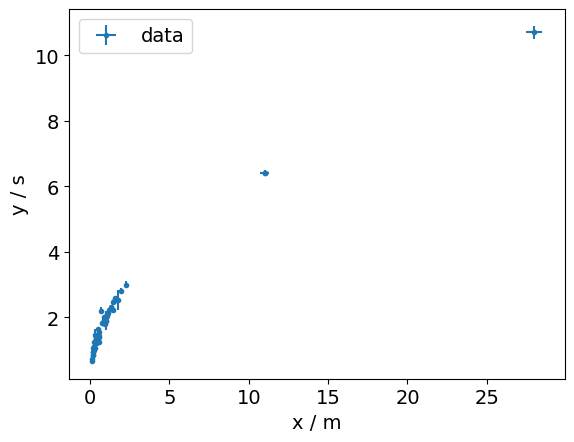

In [4]:
l = data[:,0]
dl = data[:,1]
T = data[:,2]/10 
dT = data[:,3]/10

plt.errorbar(l,T,yerr=dT, xerr=dl,fmt='.', label='data')

plt.xlabel('x / m')

plt.ylabel('y / s')

plt.legend()

Eftersom sambandet mellan $l$ och $T$ inte är linjärt ansätter vi sambandet:

$T = A\cdot l^B$

och logartmerar. Skapa variablerna $x = \ln{(l)}$ och $y = \ln{(T)}$. (Kom ihåg att naturliga logaritmen i *numpy* skrivs `np.log()`.) Beräkna också osäkerheterna i $x$ och $y$ med hjälp av felfortplantning. Om du inte kommer ihåg hur man gör kan du titta på Hemuppgift 3.

Skapa en graf över $y$ som funktion av $x$ med osäkerheter i båda.

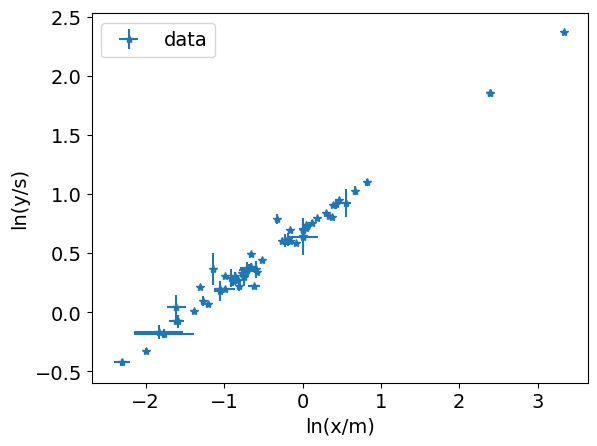

In [5]:
x = np.log(l)
y = np.log(T)

dx = dl/l
dy = dT/T

fig, ax = plt.subplots()

ax.errorbar(x,y,yerr=dy, xerr=dx, fmt='*', label='data')

ax.set_xlabel('ln(x/m)')
ax.set_ylabel('ln(y/s)')

ax.legend()

### Felfortplanta osäkerheten i x till y

Det logaritmerade sambandet blir

$\ln(T) = A + B \cdot \ln{l}$

eller med våra nya variabler x och y:

$y = A + B \cdot x$

om vi antar att $B ≈ 0.5$ kan vi felfortplanta osäkerheterna i $x$ till $y$. Dessa osäkerheter är oberoende och vi kan beräkna totala osäkerheten i $y$, $\delta y_{tot}$. Gör det och gör en ny graf med osäkerheterna $\delta y_{tot}$ endast i $y$.

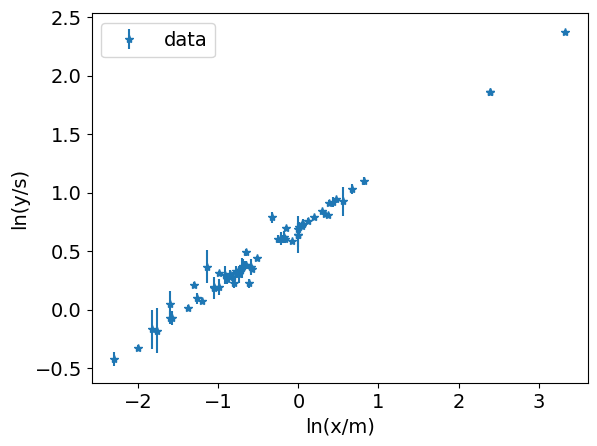

In [6]:
dyx = 0.5*dx

s_ytot = np.sqrt(dy**2 + dyx**2)

fig, ax = plt.subplots()

ax.errorbar(x,y,yerr=s_ytot, fmt='*', label='data')

ax.set_xlabel('ln(x/m)') 
ax.set_ylabel('ln(y/s)')

ax.legend()

### Anpassa en rät linje med np.polyfit

Använd funtionen [`np.polyfit()`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) för att göra en viktad minsta-kvadratanpassning till data. Enligt manualen till `np.polyfit()` kan man göra en viktad anpassning genom att ange vikterna $w = \frac{1}{\delta y_{tot}}$, där $\delta y_{tot}$ är de totala osäkerheterna i y. Gör det. Sätt också flaggan `cov=True` för att få osäkerheter i de anpassade parametrarna.

In [7]:
fit,cov = np.polyfit(x,y,1, cov=True, w=(1/s_ytot))
print(fit, cov)

[0.48847186 0.69848625] [[ 4.57708717e-05 -9.68876270e-07]
 [-9.68876270e-07  3.10415515e-05]]


Spara parametrarna från anpassningen i variablerna *B* och *A*. Spara också standardavvikelserna för $A$ och $B$ i variablerna *dA* och *dB*. Skriv ut alla anpassade variabler.

In [8]:
B = fit[0]
A = fit[1]
dB = np.sqrt(cov[0,0])
dA = np.sqrt(cov[1,1])
dAB = cov[0,1]

print(f'A = {A.round(3)} ± {dA.round(3)} B = {B.round(3)} ± {dB.round(3)}')

A = 0.698 ± 0.006 B = 0.488 ± 0.007


Skapa en graf över data med osäkerheter tillsammans med den anpassade linjen:

$y = A + Bx$

Om du vill kan du också beräkna osäkerheten i de anpassade värden och inkludera dess i grafen, exempelvis med `plt.fill_between()`. Kom ihåg att osäkerheterna inte är oberoende och att vi därför måste inkludera kovariansen om vi vill uppskatta osäkerheten i y-värdena.

$\sigma_y = \sqrt{\left(\frac{\partial y}{\partial A}  \right)^2 \sigma_A^2 + \left(\frac{\partial y}{\partial B}  \right)^2 \sigma_B^2 + 2\frac{\partial y}{\partial A}\frac{\partial y}{\partial B}\sigma_{AB}}$

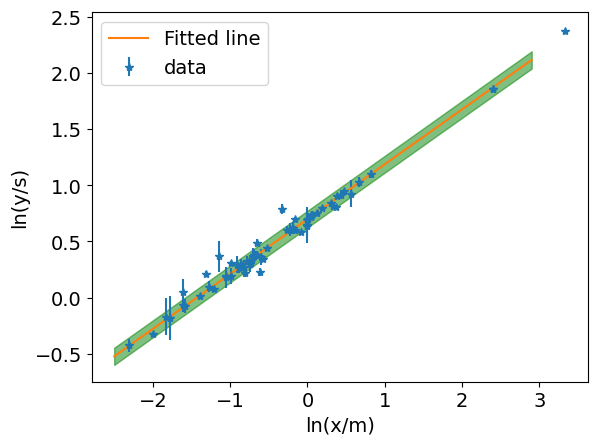

In [16]:
x_linje = np.arange(-2.5, 3, 0.1)
s_fit = np.sqrt(dA**1 + x_linje**2*dB**2 + 2*x_linje*dAB)
y_linje = A+B*x_linje

fig, ax = plt.subplots()

ax.errorbar(x,y,yerr=s_ytot, fmt='*', label='data')
ax.plot(x_linje, y_linje, label='Fitted line')
ax.fill_between(x_linje, y_linje+s_fit, y_linje-s_fit, alpha=0.5, color='green')

ax.set_xlabel('ln(x/m)') 
ax.set_ylabel('ln(y/s)')

ax.legend()

Använd teorin för en matematisk pendel och beräkna värdet på konstanten $g$ utifrån det anpassade värdet på $A$. Använd felfortplantningsformeln för att beräkna osäkerheten i $g$. Skriv ut resultatet med korrekt antal signifikanta siffror.

$g= \frac{4\pi^2}{e^{2A}}$

$s_g= -\frac{8\pi^2}{e^{2A}} \cdot s_a$

In [10]:
g = (4*np.pi**2)/np.exp(2*A)

s_g = -(8*np.pi**2)/np.exp(2*A) * dA

print(f'g = {g.round(1)} ± {s_g.round(1)}')

g = 9.8 ± -0.1


Beräkna $T$ och $l$ från de anpassade värdena på $A$ och $B$, och gör en graf av den anpassade kurvan. Lägg också in data-punkterna med osäkerheter.

Om du beräknade osäkerheten i den anpassade linjen ($\sigma_y$) ovan kan du propagera dessa osäkerheter till de anpassade värden på $T$ och inkludera dessa i grafen med `plt.fill_between()`.

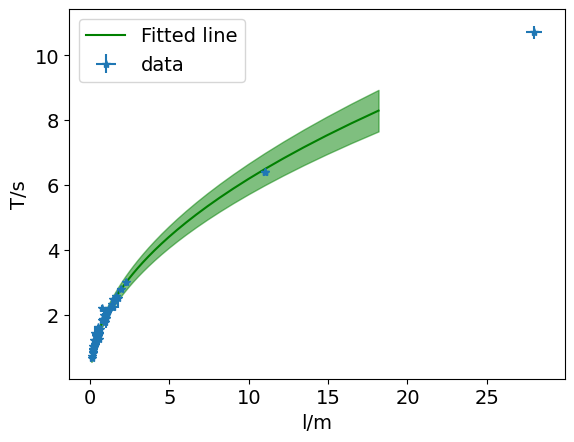

In [17]:
l_fitted = np.exp(x_linje)
T_fitted = np.exp(A+B*x_linje)

dT_fitted = T_fitted*s_fit

fig, ax = plt.subplots()

ax.errorbar(l,T,yerr=dT, xerr=dl, fmt='*', label='data')
ax.plot(l_fitted, T_fitted, label='Fitted line', color='green')
ax.fill_between(l_fitted, T_fitted+dT_fitted, T_fitted-dT_fitted, alpha=0.5, color='green')


ax.set_xlabel('l/m') 
ax.set_ylabel('T/s')

ax.legend()

# Frivillig extrauppgift

### Anpassa med Scipy curve_fit

Ett alternativ till att logaritmera funktionen och göra en linjär anpassning är att använda biblioteket *scipy.optimize* som kan anpassa godtyckliga funktioner till data med numerisk optimering. Läs in biblioteket med `import scipy.optimize as optimize`.

In [ ]:
import scipy.optimize as optimize

För att använda `optimize` måste vi först definiera funktionen vi vill anpassa. Använd `def` och skapa en funktion (kalla den `f`) som tar en variabel ($l$) och två parametrar ($a$ och $b$) och returnerar 

$T = a \cdot l^b$

Vi ställer alltså hypotesen att periodtiden ($T$) är proportinell mot $l^b$, där $a$ och $b$ är två godtyckliga konstanter som ska optimeras gentemot data för $l$ och $T$.

In [ ]:
def f(l,a,b):
    T = a*l**b
    return T

För att göra anpassning anropas funktionen [`optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Som du kan se i hjälpen tar funktionen ett antal argument. Det första är namnet på den funktion du vill anpassa, det vill säga den funktion du skapat ovan. Argument två och tre är dina x- respektive y-data (dvs $l$ och $T$). 

In [ ]:
popt, covar = optimize.curve_fit(f, l, T)

Skriv ut `popt` och `covar` och lista ut vad de olika värdena är. Skapa sedan variablerna $a$ och $b$ med osäkerheterna $da$ och $db$.

Använd teorin för en matematisk pendel och beräkna värdet på konstanten $g$ med osäkerhet utifrån det anpassade värdet på $a$. Använd felfortplantningsformeln för att beräkna osäkerheten i $g$. Skriv ut resultatet med korrekt antal signifikanta siffror.

**Svar:**

$g = \left(\frac{2\pi}{a}\right)^2$


$\sigma_g = \left| \frac{dg}{da} \right| \sigma_a = ...$

Gör en graf av data för $T$ som funktion av $l$ med osäkerheter tillsammans med den anpassade linjen.

Även `optimize.curve_fit()` kan användas för viktade minsta kvadratanpassningar. Till skillnad mot `polyfit()` anger vi osäkerheterna (inte vikterna). Detta görs med `sigma=dT_tot`. Om du vill kan du prova.